# Story Storage: Exploratory Analysis of Personal Media Storage Metadata
**Personal Media Storage Metadata**

**Framework:** Google Data Analytics Capstone (Ask, Prepare, Process, Analyze, Share, Act)

**Author:** Hans Darmawan  
**Language:** Python  
**Analysis Type:** Exploratory Data Analysis (EDA)

---

## Project Context

This case study applies exploratory data analysis (EDA) to **anonymized personal media storage metadata** generated from photography and videography activities. As media files accumulate over time, storage usage increases rapidly, making it increasingly difficult to plan storage capacity and manage archives efficiently.

Using the **Google Data Analytics Capstone framework**, this analysis focuses on understanding **how storage is consumed**, **which file types contribute most to storage growth**, and **how shooting behavior changes over time**. The objective is to transform raw file-level metadata into clear, actionable insights that support better storage planning and long-term archive management.


## Business Task Summary

The purpose of this analysis is to explore and understand the dataset in order to identify meaningful patterns, data quality issues, and insights that can support informed decision-making. This project follows the Google Data Analytics Capstone framework and focuses on insight generation rather than predictive modeling.

## 0. Setup & Environment

This section initializes the Python environment and libraries used throughout the analysis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

sns.set_theme(style="whitegrid")

## 1. Ask

### 1.1 Business Question
What patterns, trends, and data quality considerations exist within the dataset, and how can these insights support future analysis or business decisions?

### 1.2 Stakeholders
- Data analysts and data scientists
- Business decision-makers
- Project reviewers or external audiences

### 1.3 Success Criteria
- Clear understanding of dataset structure and limitations
- Actionable insights supported by evidence
- Transparent and reproducible analysis

## 2. Prepare

This phase focuses on understanding the data source, structure, and overall reliability.

In [13]:
DATA_PATH = "data/files.csv"
df = pd.read_csv(DATA_PATH, sep=";")

df.head()

,storage_id,album_id,file_name,file_ext,file_size,file_date
0,1,1,1,jpg,5296214.0,2011-01-01 00:00
1,1,1,2,jpg,5183381.0,2011-01-01 00:00
2,1,1,3,jpg,7160517.0,2011-01-01 00:00
3,1,1,4,jpg,8718417.0,2011-01-01 00:00
4,1,1,5,jpg,5317482.0,2011-01-01 00:00


In [14]:
df.shape

(107530, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107530 entries, 0 to 107529
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   storage_id  107530 non-null  int64  
 1   album_id    107530 non-null  int64  
 2   file_name   107530 non-null  int64  
 3   file_ext    107530 non-null  object 
 4   file_size   107530 non-null  float64
 5   file_date   107530 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.9+ MB


### Data Quality Overview

This table summarizes column-level completeness and data types.

In [16]:
pd.DataFrame({
    "column": df.columns,
    "data_type": df.dtypes.astype(str),
    "non_null_count": df.notna().sum(),
    "missing_percentage": (df.isna().mean() * 100).round(2)
})

,column,data_type,non_null_count,missing_percentage
storage_id,storage_id,int64,107530,0.0
album_id,album_id,int64,107530,0.0
file_name,file_name,int64,107530,0.0
file_ext,file_ext,object,107530,0.0
file_size,file_size,float64,107530,0.0
file_date,file_date,object,107530,0.0


## 3. Process

This phase documents how the data is cleaned and prepared for analysis.

In [17]:
df_clean = df.copy()

Cleaning decisions are intentionally minimal and fully documented to preserve data integrity.

## 4. Analyze

This phase explores patterns, distributions, and relationships within the dataset.

In [18]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
storage_id,107530.0,1.945169e+00,1.554387e+00,1.0,1.00,1.0,3.00,6.000000e+00
album_id,107530.0,2.399505e+02,1.479709e+02,1.0,94.00,241.0,390.00,4.550000e+02
file_name,107530.0,5.212990e+04,2.985582e+04,1.0,26581.25,51645.5,77896.75,1.042440e+05
file_size,107530.0,1.653580e+07,1.211062e+08,3841.0,2042398.25,4776720.5,7797748.50,7.259500e+09


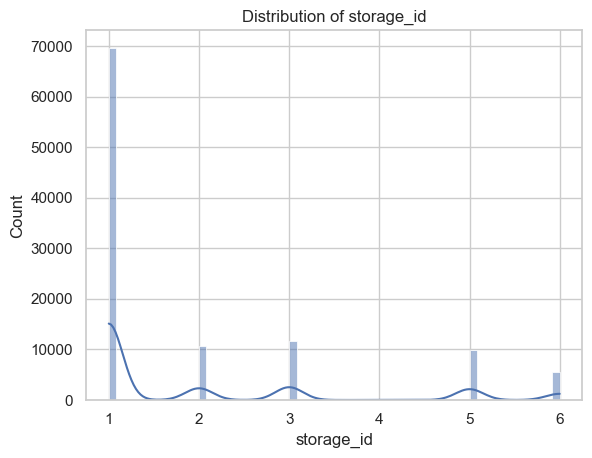

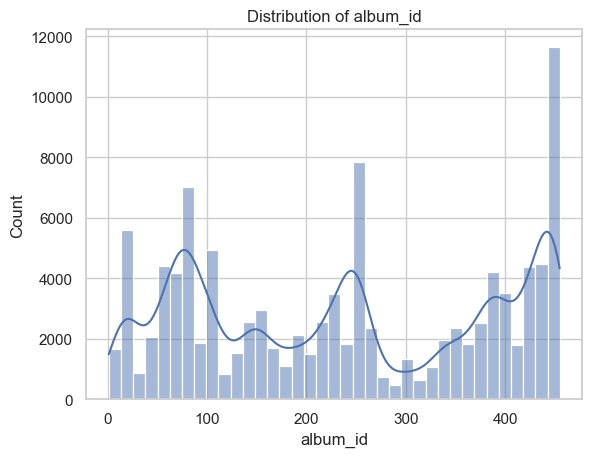

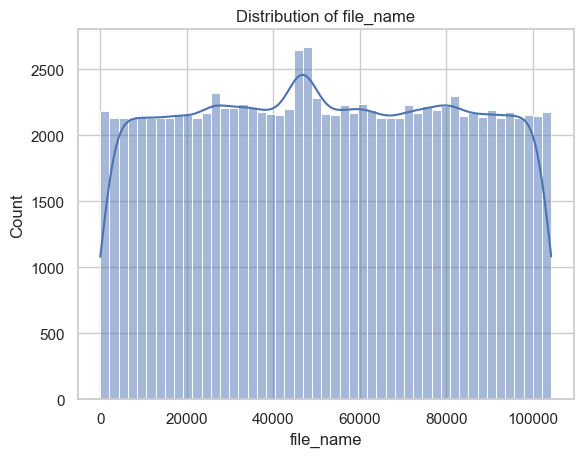

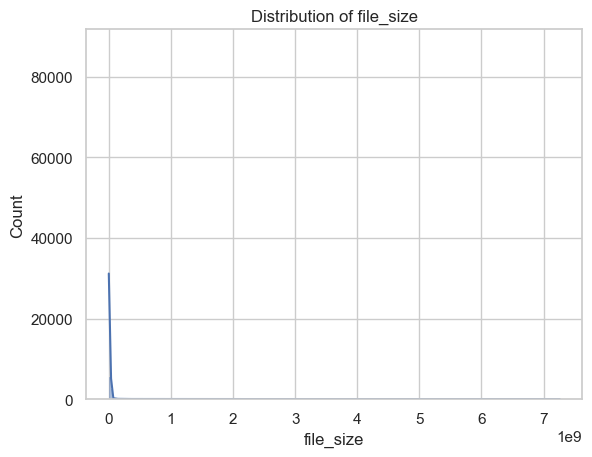

In [19]:
num_cols = df_clean.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

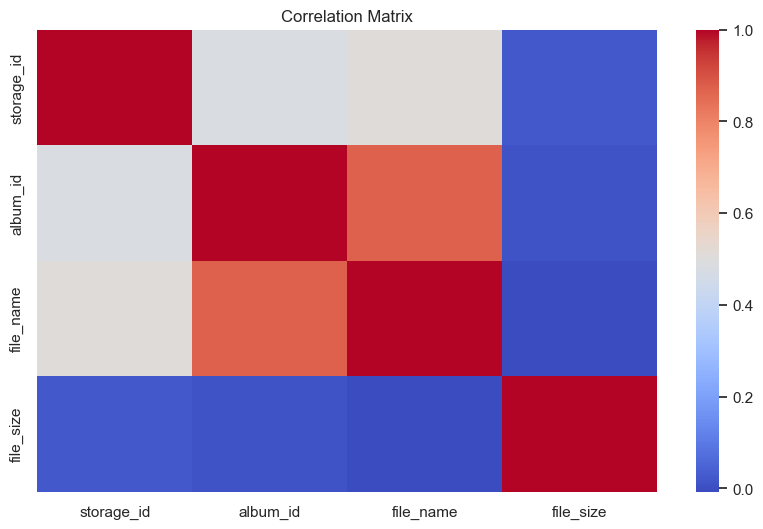

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 5. Share

### Key Insights
- Major distributions and dominant variables identified
- Correlations highlight potential relationships
- Data quality issues documented and scoped

Insights are presented in a way that can be understood by both technical and non-technical stakeholders.

## 6. Act

### Recommendations
- Improve data completeness in high-missing columns
- Standardize data types at data collection stage
- Conduct deeper analysis on key relationships

### Next Steps
- Segmentation or cohort analysis
- Time-based trend analysis
- Optional predictive modeling if objectives expand